<a href="https://colab.research.google.com/github/lc3359/planets/blob/master/dataviz_workshop_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
# %matplotlib inline
import altair as alt

In [0]:
!pip install altair # If Colab doesn't have it

In [0]:
!wget https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv

--2019-04-16 19:34:49--  https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.24.113.103, 104.24.112.103, 2606:4700:30::6818:7067, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.24.113.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5230 (5.1K) [text/plain]
Saving to: ‘annual_csv.csv’

annual_csv.csv      100%[===================>]   5.11K  --.-KB/s    in 0s      

2019-04-16 19:34:50 (53.6 MB/s) - ‘annual_csv.csv’ saved [5230/5230]



In [0]:
!ls

annual_csv.csv	sample_data


# Data Wrangling

In [0]:
temps = pd.read_csv('annual_csv.csv')

In [0]:
tempsOnlyGis = temps[temps['Source'] == 'GISTEMP']
tempsOnlyYearMean = tempsOnlyGis[['Year', 'Mean']].set_index('Year')
tempsDf = tempsOnlyYearMean

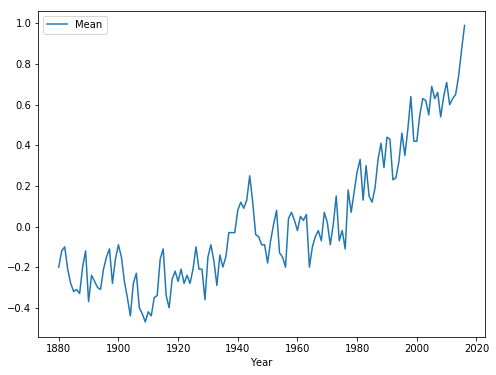

In [0]:
tempsDf.plot(figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f261f73ce80>],
      dtype=object)

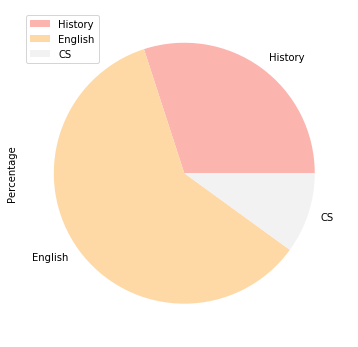

In [0]:
pd.DataFrame([0.3, 0.6, 0.1], index=['History', 'English', 'CS']
             , columns=['Percentage']).plot(kind='pie', subplots=True, figsize=(6,6), cmap='Pastel1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f261f83fac8>]],
      dtype=object)

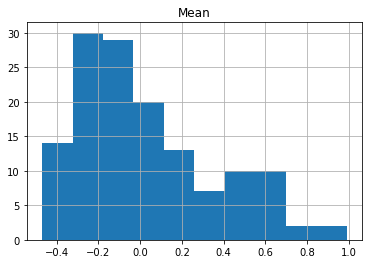

In [0]:
tempsDf.hist()

In [0]:
from vega_datasets import data
cars = data.cars()

In [0]:
# If you don't have it: !pip install vega_datasets

In [0]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [0]:
cars.groupby(by='Origin').mean()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Origin,,,,,,
Europe,16.821918,4.150685,109.465753,81.000000,27.891429,2431.493151
Japan,16.172152,4.101266,102.708861,79.835443,30.450633,2221.227848
USA,14.942520,6.283465,247.935039,119.900000,20.083534,3372.700787


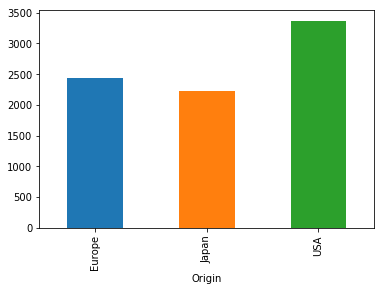

In [0]:
cars.groupby(by='Origin').mean()['Weight_in_lbs'].plot(kind='bar')

In [0]:
alt.Chart(cars).mark_bar().encode(
  x='mean(Miles_per_Gallon)',
  y='Origin',
  color='Origin'
).interactive()

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0       165.0               NaN   
  12           11.0          8         351.0       153.0               NaN   
  13           10.5          8         383.0       175.0               NaN   
  14           11.0          8         360.0       175.0               NaN   
  15           10.0          8         383.0       170.0              15.0   
  16            8.0          8         340.0       160.0              14.0   
  17            8.0          8         302.0       140.0               NaN   
  18            9.5          8         400.0       150.0              15.0   
  19           10.0          8         455.0       225.0              14.0   
  20           15.0          4         113.0        95.0              24.0   
  21           15.5          6         198.0        95.0              22.0   
  22           15.5          6         199.0        97.0              18.0   
  23           16.0          6         200.0        85.0              21.0   
  24           14.5          4          97.0        88.0              27.0   
  25           20.5          4          97.0        46.0              26.0   
  26           17.5          4         110.0        87.0              25.0   
  27           14.5          4         107.0        90.0              24.0   
  28           17.5          4         104.0        95.0              25.0   
  29           12.5          4         121.0       113.0              26.0   
  ..            ...        ...           ...         ...               ...   
  376          18.6          4         112.0        88.0              27.0   
  377          18.0          4         112.0        88.0              34.0   
  378          16.2          4         112.0        85.0              31.0   
  379          16.0          4         135.0        84.0              29.0   
  380          18.0          4         151.0        90.0              27.0   
  381          16.4          4         140.0        92.0              24.0   
  382          20.5          4         151.0         NaN              23.0   
  383          15.3          4         105.0        74.0              36.0   
  384          18.2          4          91.0        68.0              37.0   
  385          17.6          4          91.0        68.0              31.0   
  386          14.7          4         105.0        63.0              38.0   
  387          17.3          4          98.0        70.0              36.0   
  388          14.5          4         120.0        88.0              36.0   
  389          14.5          4         107.0        75.0              36.0   
  390          16.9          4         108.0        70.0              34.0   
  391          15.0          4          91.0        67.0              38.0   
  392          15.7          4          91.0        67.0              32.0   
  393          16.2          4          91.0        67.0              38.0   
  394          16.4          6         181.0       110.0              25.0   
  395   

In [0]:
points = alt.Chart(cars).mark_point().encode(
  x='Year:T',
  y='Miles_per_Gallon',
  color='Origin'
).properties(
  width=800
)

lines = alt.Chart(cars).mark_line().encode(
  x='Year:T',
  y='mean(Miles_per_Gallon)',
  color='Origin'
).properties(
  width=800
).interactive(bind_y=False)
              
points + lines

LayerChart({
  layer: [Chart({
    data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
    0            12.0          8         307.0       130.0              18.0   
    1            11.5          8         350.0       165.0              15.0   
    2            11.0          8         318.0       150.0              18.0   
    3            12.0          8         304.0       150.0              16.0   
    4            10.5          8         302.0       140.0              17.0   
    5            10.0          8         429.0       198.0              15.0   
    6             9.0          8         454.0       220.0              14.0   
    7             8.5          8         440.0       215.0              14.0   
    8            10.0          8         455.0       225.0              14.0   
    9             8.5          8         390.0       190.0              15.0   
    10           17.5          4         133.0       115.0               NaN   
    11           11.5          8         350.0       165.0               NaN   
    12           11.0          8         351.0       153.0               NaN   
    13           10.5          8         383.0       175.0               NaN   
    14           11.0          8         360.0       175.0               NaN   
    15           10.0          8         383.0       170.0              15.0   
    16            8.0          8         340.0       160.0              14.0   
    17            8.0          8         302.0       140.0               NaN   
    18            9.5          8         400.0       150.0              15.0   
    19           10.0          8         455.0       225.0              14.0   
    20           15.0          4         113.0        95.0              24.0   
    21           15.5          6         198.0        95.0              22.0   
    22           15.5          6         199.0        97.0              18.0   
    23           16.0          6         200.0        85.0              21.0   
    24           14.5          4          97.0        88.0              27.0   
    25           20.5          4          97.0        46.0              26.0   
    26           17.5          4         110.0        87.0              25.0   
    27           14.5          4         107.0        90.0              24.0   
    28           17.5          4         104.0        95.0              25.0   
    29           12.5          4         121.0       113.0              26.0   
    ..            ...        ...           ...         ...               ...   
    376          18.6          4         112.0        88.0              27.0   
    377          18.0          4         112.0        88.0              34.0   
    378          16.2          4         112.0        85.0              31.0   
    379          16.0          4         135.0        84.0              29.0   
    380          18.0          4         151.0        90.0              27.0   
    381          16.4          4         140.0        92.0              24.0   
    382          20.5          4         151.0         NaN              23.0   
    383          15.3          4         105.0        74.0              36.0   
    384          18.2          4          91.0        68.0              37.0   
    385          17.6          4          91.0        68.0              31.0   
    386          14.7          4         105.0        63.0              38.0   
    387          17.3          4          98.0        70.0              36.0   
    388          14.5          4         120.0        88.0              36.0   
    389          14.5          4         107.0        75.0              36.0   
    390          16.9          4         108.0        70.0              34.0   
    391          15.0          4          91.0        67.0              38.0   
    392          15.7          4          91.0        67.0              32.0   
    393          16.2          4          9

In [0]:
alt.Chart(cars).mark_bar().encode(
  x=alt.X('Miles_per_Gallon', bin=True),
  y='count()',
  color='Origin'
)

Chart({
  data:      Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
  0            12.0          8         307.0       130.0              18.0   
  1            11.5          8         350.0       165.0              15.0   
  2            11.0          8         318.0       150.0              18.0   
  3            12.0          8         304.0       150.0              16.0   
  4            10.5          8         302.0       140.0              17.0   
  5            10.0          8         429.0       198.0              15.0   
  6             9.0          8         454.0       220.0              14.0   
  7             8.5          8         440.0       215.0              14.0   
  8            10.0          8         455.0       225.0              14.0   
  9             8.5          8         390.0       190.0              15.0   
  10           17.5          4         133.0       115.0               NaN   
  11           11.5          8         350.0       165.0               NaN   
  12           11.0          8         351.0       153.0               NaN   
  13           10.5          8         383.0       175.0               NaN   
  14           11.0          8         360.0       175.0               NaN   
  15           10.0          8         383.0       170.0              15.0   
  16            8.0          8         340.0       160.0              14.0   
  17            8.0          8         302.0       140.0               NaN   
  18            9.5          8         400.0       150.0              15.0   
  19           10.0          8         455.0       225.0              14.0   
  20           15.0          4         113.0        95.0              24.0   
  21           15.5          6         198.0        95.0              22.0   
  22           15.5          6         199.0        97.0              18.0   
  23           16.0          6         200.0        85.0              21.0   
  24           14.5          4          97.0        88.0              27.0   
  25           20.5          4          97.0        46.0              26.0   
  26           17.5          4         110.0        87.0              25.0   
  27           14.5          4         107.0        90.0              24.0   
  28           17.5          4         104.0        95.0              25.0   
  29           12.5          4         121.0       113.0              26.0   
  ..            ...        ...           ...         ...               ...   
  376          18.6          4         112.0        88.0              27.0   
  377          18.0          4         112.0        88.0              34.0   
  378          16.2          4         112.0        85.0              31.0   
  379          16.0          4         135.0        84.0              29.0   
  380          18.0          4         151.0        90.0              27.0   
  381          16.4          4         140.0        92.0              24.0   
  382          20.5          4         151.0         NaN              23.0   
  383          15.3          4         105.0        74.0              36.0   
  384          18.2          4          91.0        68.0              37.0   
  385          17.6          4          91.0        68.0              31.0   
  386          14.7          4         105.0        63.0              38.0   
  387          17.3          4          98.0        70.0              36.0   
  388          14.5          4         120.0        88.0              36.0   
  389          14.5          4         107.0        75.0              36.0   
  390          16.9          4         108.0        70.0              34.0   
  391          15.0          4          91.0        67.0              38.0   
  392          15.7          4          91.0        67.0              32.0   
  393          16.2          4          91.0        67.0              38.0   
  394          16.4          6         181.0       110.0              25.0   
  395   

In [0]:
chart = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color='Origin'
).interactive()

In [0]:
chart.save('test.html')